In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from datetime import datetime

In [2]:
df1 = pd.read_csv('cleaned_forest_data.csv')
df2 = pd.read_csv('cleaned_grassland_data.csv')
df = pd.read_csv('cleaned_combined_data.csv')

In [49]:
conserv = df.loc[0:,['Location_Type','Common_Name','AOU_Code','PIF_Watchlist_Status','Regional_Stewardship_Status']]

In [50]:
conserv

,Location_Type,Common_Name,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status
0,Forest,Eastern Towhee,EATO,False,True
1,Forest,White-breasted Nuthatch,WBNU,False,False
2,Forest,Red-bellied Woodpecker,RBWO,False,False
3,Forest,Orchard Oriole,OROR,False,False
4,Forest,Northern Mockingbird,NOMO,False,False
...,...,...,...,...,...
14433,Grassland,Blue Jay,BLJA,False,False
14434,Grassland,Indigo Bunting,INBU,False,True
14435,Grassland,Indigo Bunting,INBU,False,True
14436,Grassland,American Robin,AMRO,False,False


In [30]:
species_conserv = conserv[conserv['PIF_Watchlist_Status']==True]

In [39]:
species_conserv_df = species_conserv.groupby('Common_Name')['PIF_Watchlist_Status'].sum().reset_index(name='count')

In [66]:
species_conserv_df = species_conserv_df[species_conserv_df['count']>1].reset_index(drop=True)

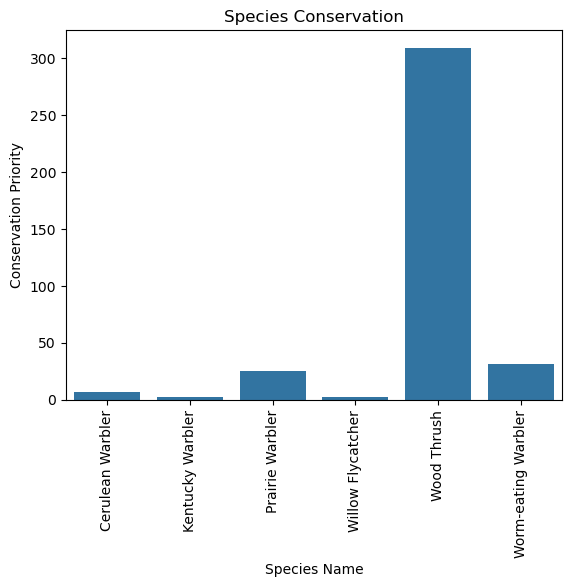

In [67]:
sns.barplot(
    data = species_conserv_df,
    x='Common_Name',
    y='count'
)
plt.xlabel('Species Name')
plt.ylabel('Conservation Priority')
plt.xticks(rotation=90)
plt.title('Species Conservation')
plt.show()

In [52]:
regional_conserv = conserv[conserv['Regional_Stewardship_Status']==True]

In [53]:
regional_conserv_df = regional_conserv.groupby(['Location_Type','AOU_Code'])['Regional_Stewardship_Status'].sum().reset_index(name='count')

In [63]:
regional_conserv_df = regional_conserv_df[regional_conserv_df['count']>45].reset_index(drop=True)

In [64]:
regional_conserv_df

,Location_Type,AOU_Code,count
0,Forest,ACFL,436
1,Forest,CACH,271
2,Forest,DOWO,206
3,Forest,EATO,98
4,Forest,EAWP,486
5,Forest,HOWA,64
6,Forest,INBU,148
7,Forest,SCTA,197
8,Forest,WOTH,290
9,Forest,YTVI,55


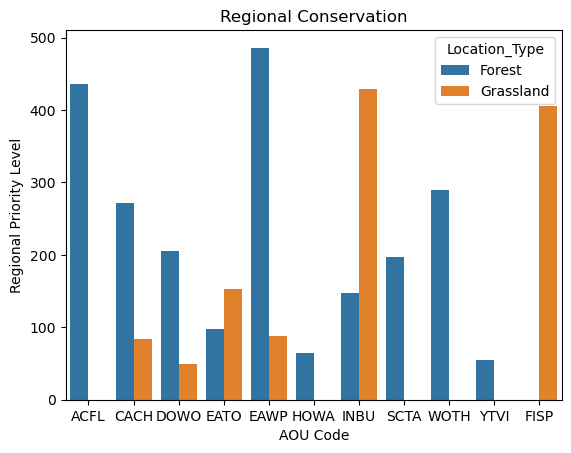

In [65]:
sns.barplot(
    data = regional_conserv_df,
    x = 'AOU_Code',
    y = 'count',
    hue = 'Location_Type'
)
plt.xlabel('AOU Code')
plt.ylabel('Regional Priority Level')
plt.xticks(rotation=0)
plt.title('Regional Conservation')
plt.show()